### Práctico 4 - Introducción al aprendizaje no supervisado


Trabajaremos con el mismo dataset utilizado en curación de datos (deben utilizar el dataset que se encuentra con los datos modificados o bien aplicar los mismos métodos del trabajo anterior para contar con datos válidos)

El dataset cuenta con X features, siendo las más importantes

Componente: Indica a que componente pertenece la muestra
* Horas Funcionamiento: Indica la cantidad de horas de funcionamiento del camión (sería como el kilometraje de los camiones)
* Horas del Aceite: Representa la cantidad de horas de utilización del aceite (este dato es importante dado que a medida que, a mayor horas de uso del aceite, el mismo comienza a desgastarse)
* Resultado: (El laboratorio indica si la muestra de aceite está Bien = 1, Regular=2, Mal=3)
* St: Presencia de Hollin en el Aceite
* Al: Presencia de Aluminio en el Aceite
* Fe Presencia de Hierro en el Aceite
* Si Presencia de Silicio en el Aceite
* Na Presencia de Sodio en el Aceite
* Visco: Viscosidad del aceite
* Fecha de Análisis: Indica cuando fué analizada la muestra por el laboratorio

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [4]:
dataset = pd.read_csv('OilDataSetCuracion.csv', parse_dates=["Fecha de Análisis"])

c:\users\natalia\envs\diplodatos\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
dataset.rename(columns={'Horas Funcionamiento': 'Horas_Funcionamiento', 
                        'Horas del Aceite': 'Horas_del_Aceite',
                       'Fecha de Análisis': 'Fecha_de_Analisis'}, inplace=True)

Filtramos los datos de motores, ya que es el componente con mayor cantidad de datos:

In [6]:
engines = dataset[dataset.Componente == 'Motor']

In [7]:
engines.head()

,Equipo,Componente,Id,Resultado,Horas_Funcionamiento,Horas_del_Aceite,Fecha_de_Analisis,B,Nit,Oxi,...,Zn,Ag,Ti,V40,V100,TBN,TAN,ISO14,ISO4,ISO6
3,1355,Motor,273586.0,3.0,21950.0,409.0,2019-02-20,51.0,9.0,22.0,...,1089.0,0.0,0.0,NaN,13.7,9.1,NaN,NaN,NaN,NaN
12,1357,Motor,156982.0,1.0,27876.0,263.0,2017-11-05,NaN,6.0,9.0,...,1246.0,0.0,0.0,NaN,14.0,NaN,NaN,NaN,NaN,NaN
29,1356,Motor,295810.0,3.0,28295.0,NaN,2019-05-17,47.0,10.0,25.0,...,1122.0,0.0,0.0,NaN,14.2,10.4,NaN,NaN,NaN,NaN
49,1355,Motor,283998.0,3.0,22729.0,380.0,2019-04-03,100.0,6.0,12.0,...,1334.0,0.0,0.0,NaN,14.1,9.8,NaN,NaN,NaN,NaN
50,1355,Motor,294825.0,2.0,23153.0,424.0,2019-05-12,105.0,8.0,20.0,...,1331.0,0.0,0.0,NaN,14.3,9.6,NaN,NaN,NaN,NaN


Y filtramos los elementos quimicos mas importantes

In [12]:
cols = ['Resultado', 'Horas_del_Aceite', 'St', 'Al', 'Fe', 'Si', 'Na']
min_engine = engines[cols]

In [14]:
min_engine = min_engine.dropna()
min_engine.head()

,Resultado,Horas_del_Aceite,St,Al,Fe,Si,Na
3,3.0,409.0,57.0,3.0,74.0,6.0,15.0
12,1.0,263.0,24.0,1.0,12.0,2.0,8.0
49,3.0,380.0,28.0,2.0,50.0,5.0,3.0
50,2.0,424.0,52.0,2.0,37.0,7.0,2.0
57,2.0,82.0,14.0,2.0,14.0,4.0,2.0


Se observa la cantidad de muestras para los resultados de laboratorio 1 Buena - 2 Regular - 3 Mala

In [16]:
min_engine.groupby(['Resultado']).agg(['count'])

,Horas_del_Aceite,St,Al,Fe,Si,Na
,count,count,count,count,count,count
Resultado,,,,,,
1.0,1174,1174,1174,1174,1174,1174
2.0,488,488,488,488,488,488
3.0,320,320,320,320,320,320


In [44]:
X = min_engine.iloc[:,2:6].values
y = min_engine.iloc[:,0].values

In [45]:
X

array([[57.,  3., 74.,  6.],
       [24.,  1., 12.,  2.],
       [28.,  2., 50.,  5.],
       ...,
       [53.,  2., 69.,  6.],
       [18.,  3., 23.,  8.],
       [72.,  2., 47.,  6.]])

In [20]:
y

array([3., 1., 3., ..., 3., 2., 2.])

In [21]:
# load decomposition to do PCA analysis with sklearn
from sklearn import decomposition

In [22]:
pca = decomposition.PCA(n_components=3)

In [23]:
 pc = pca.fit_transform(X)

In [24]:
pc_df = pd.DataFrame(data = pc , columns = ['PC1', 'PC2', 'PC3'])
pc_df['Cluster'] = y
pc_df.head()

,PC1,PC2,PC3,Cluster
0,-0.403699,51.157091,18.940604,3.0
1,-4.419449,-16.463249,-0.106563,1.0
2,-1.347086,13.754910,23.281108,3.0
3,0.530060,20.973275,-3.050720,2.0
4,-2.374959,-21.923956,8.488978,2.0


In [25]:
pc_df.groupby(['Cluster']).agg(['count'])

,PC1,PC2,PC3
,count,count,count
Cluster,,,
1.0,1174,1174,1174
2.0,488,488,488
3.0,320,320,320


In [26]:
pca.explained_variance_ratio_

array([0.90314539, 0.07972444, 0.01692262])

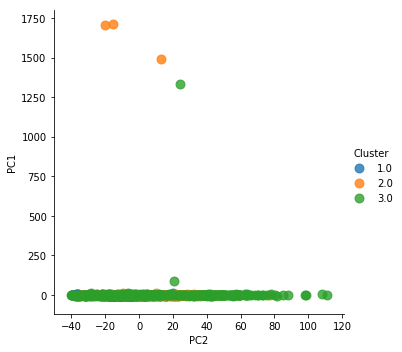

In [27]:
sns.lmplot( y="PC1", x="PC2",
  data=pc_df, 
  fit_reg=False, 
  hue='Cluster', # color by cluster
  legend=True,
  scatter_kws={"s": 80}) # specify the point size



# Nota
Utilizando los 2 primeros PCA.. no se logra visualizar claramente los cluster, en la sección inferior verde, se visualizan elementos de otros cluster en el fondo.

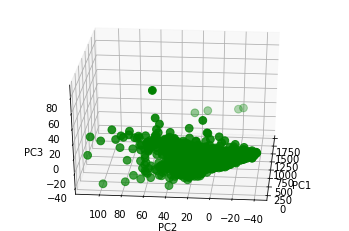

In [28]:
from mpl_toolkits.mplot3d import Axes3D

colores=['red','green','yellow']
asignar=[]

for row in y:
    if row == 'Alta':
        asignar.append('red')
    elif row == 'Media':
        asignar.append('yellow')
    else:
        asignar.append('green')


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pc_df["PC1"], pc_df["PC2"], pc_df["PC3"], c=asignar,  s=60)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.c = asignar
ax.view_init(30, 185)
plt.show()

Tampoco puede visualizare una separación en 3D

# KMEANS

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans as kmeans
from sklearn.metrics import pairwise_distances_argmin_min
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (26, 9)
plt.style.use('ggplot')

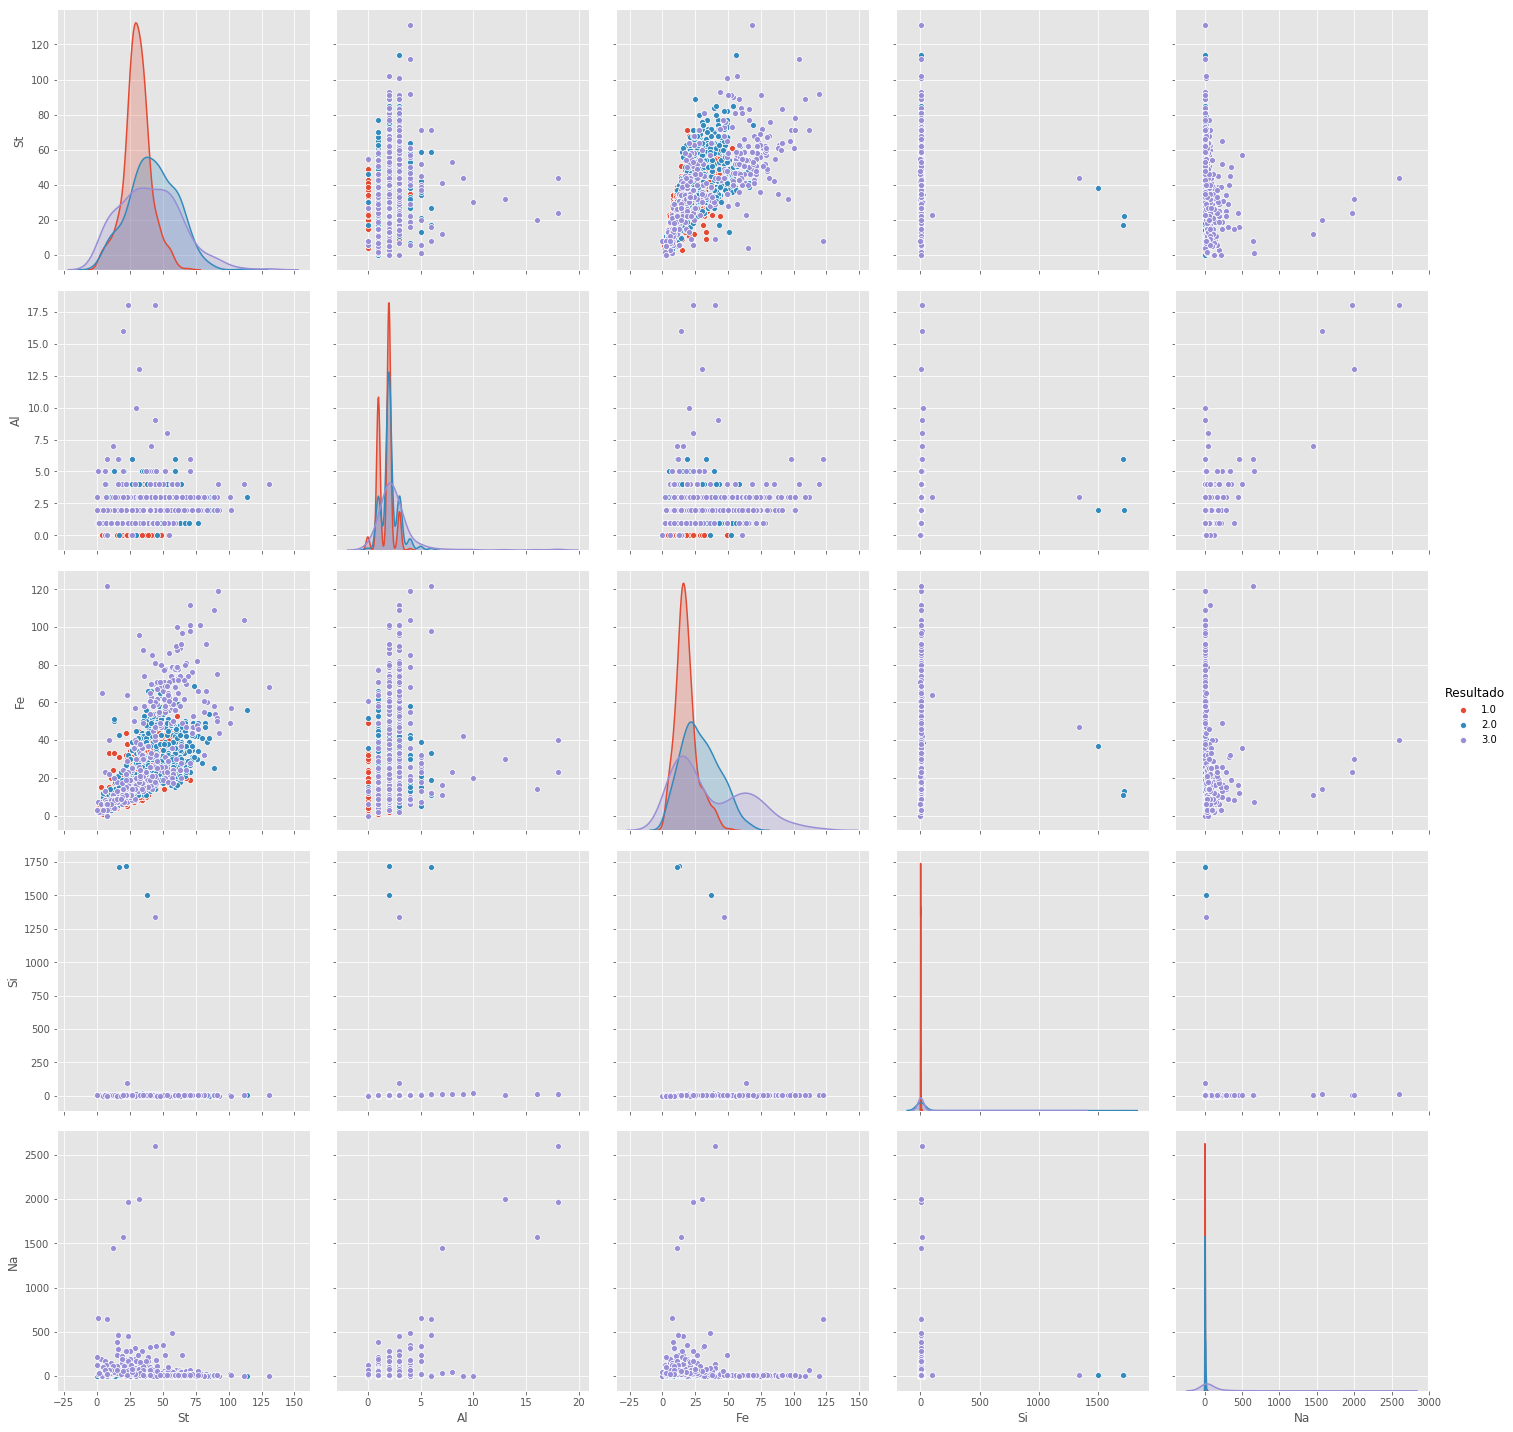

In [31]:
sb.pairplot(min_engine.dropna(), hue='Resultado',size=4,vars=["St","Al","Fe","Si","Na"],kind='scatter')

In [46]:
X = np.array(min_engine[['Si','Fe','Al']])
y = np.array(min_engine['Resultado'])
X.shape

(1982, 3)

In [48]:
X

array([[ 6., 74.,  3.],
       [ 2., 12.,  1.],
       [ 5., 50.,  2.],
       ...,
       [ 6., 69.,  2.],
       [ 8., 23.,  3.],
       [ 6., 47.,  2.]])

Luego de cruzar las variables entre si observamos que las mejores separaciones se dan entre Si, Fe, Al-. Probamos Kmean con estos 3 parámetros


In [51]:
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[   3.08535826   17.46666667    1.86417445]
 [1568.5          27.            3.25      ]
 [   4.09651475   51.89276139    2.26809651]]


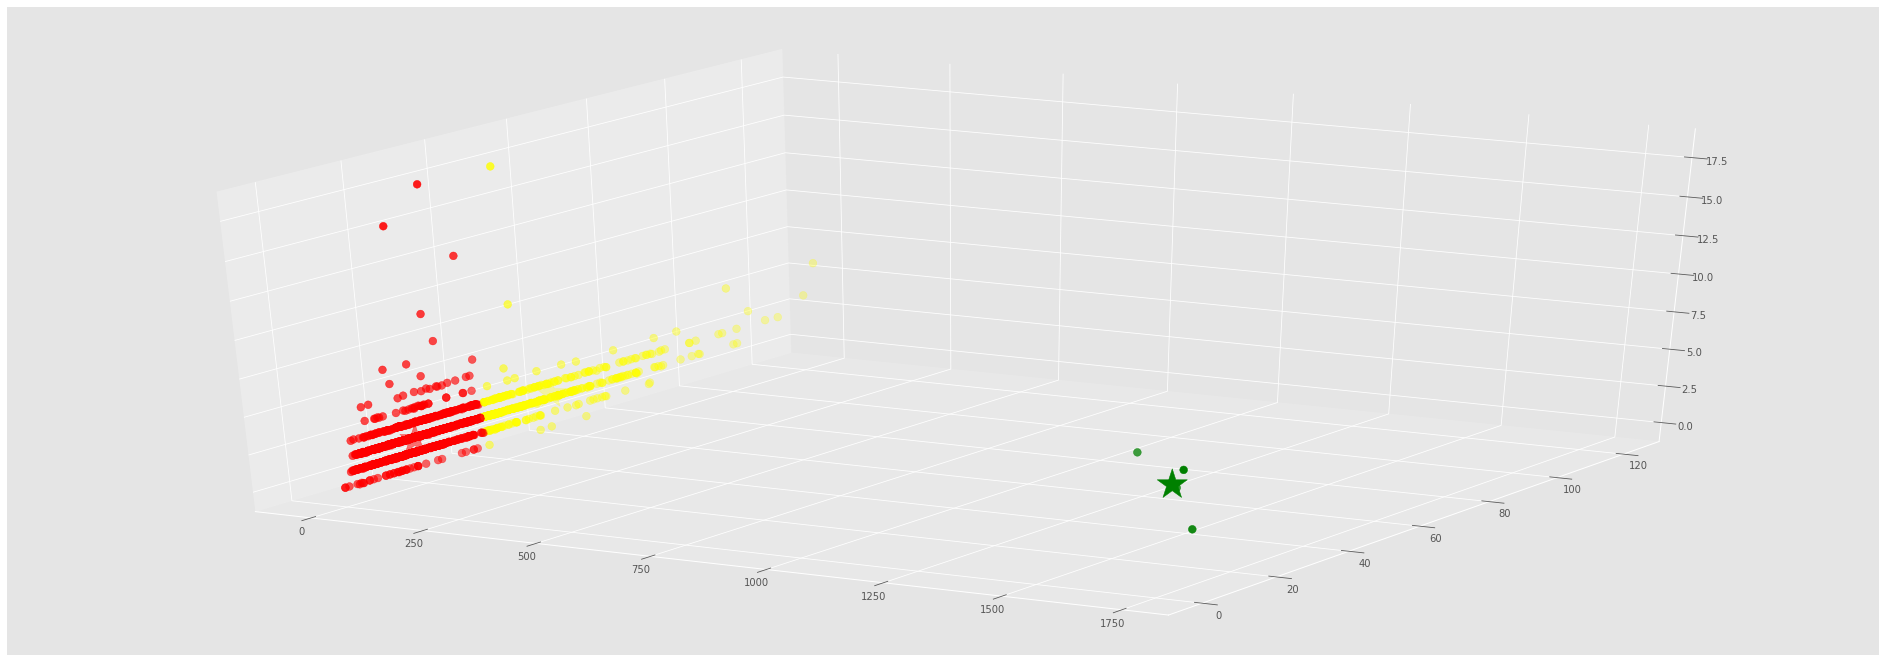

In [52]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

In [53]:
from collections import Counter
Counter(labels)

Counter({2: 373, 0: 1605, 1: 4})

Vemos que KMeans puede separar claramente los 3 cluster.
